In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Getting Training/Testing Data:



In [ ]:
mnist = fetch_openml('mnist_784')

X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.2,shuffle = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
model1 = MLPClassifier([16,16])

model1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[16, 16])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['4'], dtype='<U1')

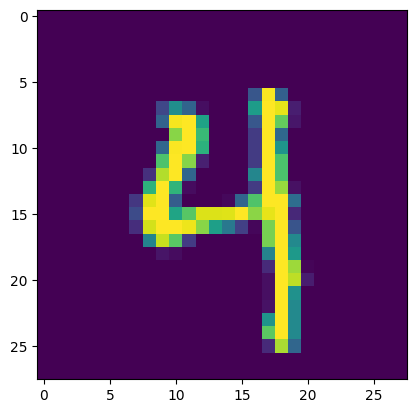

In [ ]:
i = 60
count = 0
trying = X_test.iloc[i].values
plt.imshow(trying.reshape(28,28))
model1.predict(trying.reshape(1,-1))


In [ ]:
for i in range(len(y_test)):
    trying = X_test.iloc[i].values
    pred = int(model1.predict(trying.reshape(1,-1)))
    sm = int(y_test.values[i])
    if pred != sm:
        count += 1

print(count)
print(len(y_test))

In [ ]:
956/14000

0.06828571428571428

Looks like the model missed about 6 % of the testing data! :(

Lets look at the next model, a random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
model2 = RandomForestClassifier(n_estimators=1000)
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype=object)

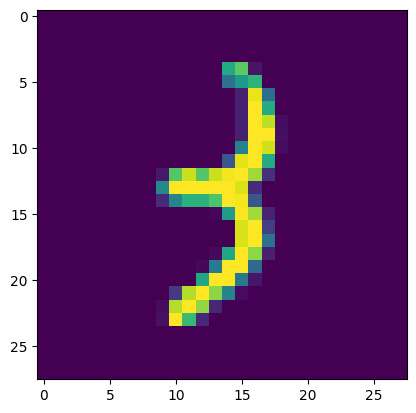

In [ ]:
i = 6
count = 0
trying = X_test.iloc[i].values
plt.imshow(trying.reshape(28,28))
model2.predict(trying.reshape(1,-1))

Lets see if logistic regression works

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
train_samples = 0.2*14000

In [ ]:
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

model3 = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
model3.fit(X_train, y_train)

LogisticRegression(C=0.017857142857142856, penalty='l1', solver='saga', tol=0.1)

In [ ]:
model3.score(X_test,y_test)

0.8977857142857143

90 % Accuracy :/




In [ ]:
from sklearn import svm, metrics

In [ ]:
model4 = svm.SVC()
model4.fit(X_train,y_train)

# Final Write-Up

In this project, I used four different models to classify hand-written digits in the MNIST dataset. The four models were the multilayer-perceptron, the randomforest, logistic regression, and support vector machines. Of these, my favorite is the multilayered perceptron because I know the most about them and find that they are generalizeable to so many applications.

To understand the MLP, we can start with a simple linear regression. A linear regression is helpful for attaching an input to an output when we assume that there is a linear relationship between the two.
For the MNIST dataset, our inputs are flattened 28 x 28 pixel images that have been flattened into vectors of dim 784, and the outputs are a probability distribution ranging from 0 to 9. At this point it almost looks like the logistic regression model except that one is passed through the logistic function rather than linear. We do pass our linear regression outputs through a nonlinear function, called rectified linear unit.

What I have described so far is the Perceptron algorithm. It has no hidden layers in it, so it is really only good for passing extremely simple data. To make this a multilayer perceptron, instead of the inputs passing data through to the outputs, we let them go to another layer of neurons. In my model for this project I have two hidden layers, with 16 neurons each. Each nueron is a container for a number, called an activation. The input layer has 784 neurons, and the output layer has ten.

When the model.fit() function is run, this means we pass samples through the network that are attached to labels that have been one-hot encoded, meaning they are a list of zeros except at the index they are matched to. For example, a 7 in OHE would be [0,0,0,0,0,0,0,1,0,0]. This allows the loss function to get feedback for each pass. The MLP.fit() function probably does some form of gradient descent to find a minimum for this loss function.
This minumim is a vactor that is [(784x16+16x16+16x10){weights} + (16+16+10){biases}] dimensional, representing a point in the solution space where each weight and biases contribute to the input vector flowing to a probability distribution matching most closely its OHE label.

What I like about thes network algorithms is that they are highly malleable and can incorporate virually endless machine learning alorithms within them. For example you could use a logistic regression as one of the layers instead of linear, which I did. you could put a random forest in for a layer, (though my senses tell me that this would be extremely inefficient.)
In the world of deep learning, it all takes place within a neural network framework, and the MLP is the most basic version of that.
